# Multivariate Time Series Analysis using RNN LSTM

In [123]:
# usual imports #
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [124]:
import warnings
warnings.filterwarnings(action='ignore')

In [125]:
from pylab import rcParams
rcParams['figure.figsize']=12,5

In [126]:
# import the dataset #
sensor = pd.read_csv('DATA/energydata_complete.csv',index_col='date',infer_datetime_format=True)

In [127]:
sensor.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [128]:
len(sensor)

19735

In [129]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 

In [130]:
sensor.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [131]:
# we will skip the exploratory data analyis in view of time and prepare data for modeling #

In [132]:
rows_per_day = (24*60)/10
rows_per_day

144.0

In [133]:
# split the data into train and test set #
# test set --> 2 days of data which is 144 x 2 = 288 rows. Remaining would be the train set

sensor_cut = sensor[:2160]  # reducing the total dataset size for faster epoch cycle 
train = sensor_cut[:-288]
test = sensor_cut[-288:]

## Scale the Data 

In [134]:
from sklearn.preprocessing import MinMaxScaler

In [135]:
scaler = MinMaxScaler()

In [136]:
scaler.fit(train)

MinMaxScaler()

In [137]:
scaled_train = scaler.transform(train)

In [138]:
scaled_test = scaler.transform(test)

In [139]:
scaled_train.shape

(1872, 28)

In [140]:
length = 144 # use the entire set of 1 day data to predict the next 10 min 
n_features = scaled_train.shape[1]
batch_size = 1

In [141]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [142]:
generator = TimeseriesGenerator(data=scaled_train,targets=scaled_train,length=length,batch_size=batch_size)

In [143]:
X,y = generator[0]

In [144]:
X.shape

(1, 144, 28)

In [145]:
y.shape

(1, 28)

## Create the RNN's LSTM Model

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import EarlyStopping

In [147]:
model = Sequential()

model.add(LSTM(units=100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(n_features))

model.compile(optmizer='adam',loss='mse')

In [148]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               51600     
_________________________________________________________________
dense_4 (Dense)              (None, 28)                2828      
Total params: 54,428
Trainable params: 54,428
Non-trainable params: 0
_________________________________________________________________


## Early Stopping

In [149]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
validation_generator =  TimeseriesGenerator(data=scaled_test,targets=scaled_test,
                                           length=length,batch_size=batch_size)

## Execute the Model

In [150]:
model.fit_generator(generator,epochs=10,callbacks=[early_stop],validation_data=validation_generator)

Epoch 1/10
1728/1728 [==============================] - 494s 286ms/step - loss: 0.0178 - val_loss: 0.0139
Epoch 2/10
1728/1728 [==============================] - 493s 285ms/step - loss: 0.0103 - val_loss: 0.0111
Epoch 3/10
1728/1728 [==============================] - 475s 275ms/step - loss: 0.0090 - val_loss: 0.0127
Epoch 4/10
1728/1728 [==============================] - 496s 287ms/step - loss: 0.0084 - val_loss: 0.0125


In [151]:
loss = pd.DataFrame(data=model.history.history)

In [152]:
loss

,loss,val_loss
0,0.017783,0.013879
1,0.010264,0.011112
2,0.009000,0.012681
3,0.008424,0.012500


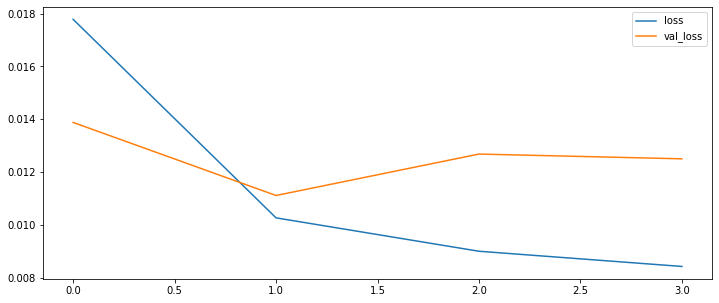

In [153]:
loss.plot() # the model can be trained further on a GPU or computer with higher processing power #

## Predictions or the Forecasts

In [161]:
n_features = scaled_train.shape[1]

test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

# loop for the number of forecast to be generated #
for i in range(len(test)):    
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    
    current_batch =  np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    
    

In [166]:
true_predictions = scaler.inverse_transform(test_predictions)

In [167]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-24 17:00:00,60,10,21.600000,45.117500,21.00,44.530000,20.445000,45.790000,17.790000,46.700000,...,15.690000,48.500000,7.900000,767.500000,96.000000,5.000000,63.000000,7.300000,26.163921,26.163921
2016-01-24 17:10:00,60,10,21.600000,45.126667,21.00,44.363333,20.500000,46.230000,17.730000,46.700000,...,15.690000,48.500000,7.916667,767.500000,96.000000,4.833333,63.166667,7.316667,39.322240,39.322240
2016-01-24 17:20:00,140,20,21.666667,45.333333,21.00,44.156667,20.566667,46.363333,17.700000,46.700000,...,15.690000,48.500000,7.933333,767.500000,96.000000,4.666667,63.333333,7.333333,4.386120,4.386120
2016-01-24 17:30:00,80,10,21.600000,44.526667,20.89,43.290000,20.600000,46.133333,17.700000,46.700000,...,15.690000,48.500000,7.950000,767.500000,96.000000,4.500000,63.500000,7.350000,12.805599,12.805599
2016-01-24 17:40:00,70,10,21.600000,44.133333,20.89,43.260000,20.600000,45.860000,17.700000,46.700000,...,15.726667,48.626667,7.966667,767.500000,96.000000,4.333333,63.666667,7.366667,17.830206,17.830206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-26 16:10:00,40,0,19.926667,45.500000,19.29,44.590000,20.445000,44.145000,19.000000,45.933333,...,17.290000,48.090000,10.050000,760.533333,76.833333,8.000000,40.000000,6.133333,20.672420,20.672420
2016-01-26 16:20:00,50,0,19.890000,45.500000,19.29,44.663333,20.390000,44.090000,19.000000,46.000000,...,17.290000,48.090000,10.000000,760.466667,76.666667,8.000000,40.000000,6.066667,35.540237,35.540237
2016-01-26 16:30:00,40,0,19.890000,45.500000,19.23,44.590000,20.463333,44.163333,18.963333,46.030000,...,17.230000,48.030000,9.950000,760.400000,76.500000,8.000000,40.000000,6.000000,21.914711,21.914711


In [168]:
test.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [169]:
Predictions = pd.DataFrame(true_predictions,columns=[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2']])

In [170]:
Predictions

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,4.919236e+01,1.436260e+01,2.131348e+01,4.350736e+01,2.083575e+01,4.252915e+01,2.011998e+01,4.634983e+01,1.789200e+01,4.705629e+01,...,1.600769e+01,4.786729e+01,7.568037e+00,7.668957e+02,9.299498e+01,5.194293e+00,6.068152e+01,6.491949e+00,3.104073e+01,2.929694e+01
1,9.977929e+01,2.079511e+01,2.123989e+01,4.279430e+01,2.061792e+01,4.205710e+01,2.002707e+01,4.602975e+01,1.779762e+01,4.718375e+01,...,1.614111e+01,4.798319e+01,7.511653e+00,7.659028e+02,9.050314e+01,5.366490e+00,5.831645e+01,5.955007e+00,3.034795e+01,2.856585e+01
2,1.539162e+02,2.475115e+01,2.113784e+01,4.250723e+01,2.043968e+01,4.193006e+01,1.997608e+01,4.577681e+01,1.780468e+01,4.730824e+01,...,1.625717e+01,4.787487e+01,7.541337e+00,7.653487e+02,8.846743e+01,5.545441e+00,5.655289e+01,5.564348e+00,2.943799e+01,2.810255e+01
3,2.118633e+02,2.777039e+01,2.102808e+01,4.255549e+01,2.035308e+01,4.200934e+01,1.995061e+01,4.568586e+01,1.791260e+01,4.737633e+01,...,1.638578e+01,4.760735e+01,7.638682e+00,7.652717e+02,8.714443e+01,5.659630e+00,5.467594e+01,5.359128e+00,2.867928e+01,2.787066e+01
4,2.682951e+02,3.052529e+01,2.092908e+01,4.278338e+01,2.029896e+01,4.222531e+01,1.996098e+01,4.576772e+01,1.808618e+01,4.741330e+01,...,1.649939e+01,4.725167e+01,7.796162e+00,7.654050e+02,8.646512e+01,5.741172e+00,5.279828e+01,5.318129e+00,2.813843e+01,2.774046e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-1.683006e+26,9.544895e+24,4.820054e+24,2.843305e+24,4.836004e+24,2.973165e+24,1.878330e+24,4.021530e+24,3.617537e+24,5.504859e+24,...,1.107413e+24,3.512505e+24,-4.996431e+23,1.251082e+25,2.251484e+25,1.107143e+24,1.533793e+25,3.454114e+24,1.130931e+25,3.664410e+24
284,-2.074202e+26,1.176350e+25,5.940422e+24,3.504198e+24,5.960079e+24,3.664244e+24,2.314927e+24,4.956290e+24,4.458393e+24,6.784402e+24,...,1.364819e+24,4.328947e+24,-6.157797e+23,1.541882e+25,2.774816e+25,1.364486e+24,1.890306e+25,4.256984e+24,1.393804e+25,4.516162e+24
285,-2.556328e+26,1.449779e+25,7.321206e+24,4.318710e+24,7.345434e+24,4.515957e+24,2.853006e+24,6.108325e+24,5.494697e+24,8.361360e+24,...,1.682056e+24,5.335164e+24,-7.589119e+23,1.900276e+25,3.419791e+25,1.681646e+24,2.329687e+25,5.246472e+24,1.717778e+25,5.565892e+24
286,-3.150519e+26,1.786764e+25,9.022939e+24,5.322547e+24,9.052799e+24,5.565641e+24,3.516156e+24,7.528136e+24,6.771878e+24,1.030486e+25,...,2.073032e+24,6.575262e+24,-9.353130e+23,2.341974e+25,4.214683e+25,2.072526e+24,2.871197e+25,6.465957e+24,2.117056e+25,6.859621e+24


## Improvement 
- The precision of the data in the original dataset can be reduced to 2 decimal points
- Train the model for higher number of rows in the training dataset (need a fast CPU/GPU)